<a href="https://colab.research.google.com/github/robsonmatosx/aed_projeto_1/blob/master/projeto_01_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

A base escolhida foi a vgsales ([vgsales](https://www.kaggle.com/kedokedokedo/vgsales))<br>
Escolha uma base voltado para as vendas de titulos de games. Escolhi esse tema por eu estar diretamente ligado a geração consumista de consoles e ter passado pela era de ouro dos video-games.

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


Variáveis discretas: Ano<br>
Variáveis contínuas: Vendas América do Norte, Vendas Europa, Vendas Japão, Outras Vendas, Vendas Globais<br>
Variáveis categoricas:  Plataforma, Gênero, Editora<br>



### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


A base possui 16324 registros  e 11 colunas Destas serão utilizadas 9 para compor a base de análise. 

In [0]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import matplotlib.patches as mpatches

In [0]:
#----------- import via upload ----------------- 
# from google.colab import files
# uploaded = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(uploaded['vgsales.csv']))
# ------------fim -upload ------------------------

# ----------- impor via raw git hub -----------------------------
url = "https://raw.githubusercontent.com/robsonmatosx/aed_projeto_1/master/vgsales.csv?token=ANX2SUZ5N5ARI52OMEPURYK55GKF4"
df = pd.read_csv(url)
# -----------  fim --- impor via raw git hub -----------------------------

In [0]:
#escolha das features e identificação de tipos
df.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Gênero', 'Editora', 'Vendas América do Norte', 'Vendas Europa', 'Vendas Japão', 'Outras Vendas', 'Vendas Globais']
escolha_features = ['Plataforma', 'Ano', 'Gênero', 'Editora', 'Vendas América do Norte', 'Vendas Europa', 'Vendas Japão', 'Outras Vendas', 'Vendas Globais']
df=df[escolha_features]
print(df.dtypes)

Plataforma                  object
Ano                        float64
Gênero                      object
Editora                     object
Vendas América do Norte    float64
Vendas EUA                 float64
Vendas Japão               float64
Outras Vendas              float64
Vendas Globais             float64
dtype: object


In [0]:
# análises valores mínimos e máximos

v_dados={
    'Mínimo':[min(df['Ano']),min(df['Vendas América do Norte']),min(df['Vendas Europa']),min(df['Vendas Japão']),min(df['Outras Vendas']),min(df['Vendas Globais'])],
    'Máximo':[max(df['Ano']),max(df['Vendas América do Norte']),max(df['Vendas Europa']),max(df['Vendas Japão']),max(df['Outras Vendas']),max(df['Vendas Globais'])]
    }
valores=pd.DataFrame(v_dados, index=['Ano', 'Vendas América do Norte', 'Vendas Europa', 'Vendas Japão', 'Outras Vendas', 'Vendas Globais'])
valores

,Mínimo,Máximo
Ano,1980.00,2020.00
Vendas América do Norte,0.00,41.49
Vendas EUA,0.00,29.02
Vendas Japão,0.00,10.22
Outras Vendas,0.00,10.57
Vendas Globais,0.01,82.74


In [0]:
#Tratamento valores ausentes

print(df.isnull().sum()) 


df[df['Ano'].isnull()]['Vendas Globais'].sum() # as vendas com ano nulo serão alocadas na Min(ano)-1 devido a expressividade dos dados
df[df['Editora'].isnull()]['Vendas Globais'].sum()  # as vendas com a Editora nulas serão alocadas numa nova editora [desconhecida]

df['Ano'].fillna(df['Ano'].min()-1,inplace=True) # Resgatando os dados de vendas e atribuindo/substituindo os valores nulos para o (Ano mínimo -1) no caso 1979 

df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='GBA')]='Nintendo'
df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='Wii')]='Nintendo'
df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='DS')]='Nintendo'
df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='3DS')]='Nintendo'

df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='PS')]='Sony Computer Entertainment'
df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='PS2')]='Sony Computer Entertainment'
df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='PS3')]='Sony Computer Entertainment'
df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='PSV')]='Sony Computer Entertainment'
df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='PSP')]=='Sony Computer Entertainment'

df['Editora'][(df['Editora'].isna()) & (df['Plataforma']=='X360')]='Microsoft Game Studios'

#retira dados de 2017 a 2020 - somente registros poluidos da base / incompletos
if (df[df['Ano'] >2016].index.size)>0: 
  df.drop(df[df['Ano'] >2016].index,inplace=True)
  print('>>> registros apagados')

df = df.dropna(how='any',axis=0)  #retirando demais valores nulos caso ainda existam

print('\n\nNova analise de nulls:\n',df.isnull().sum())  #avaliando registros nulos novamente

Plataforma                 0
Ano                        0
Gênero                     0
Editora                    8
Vendas América do Norte    0
Vendas EUA                 0
Vendas Japão               0
Outras Vendas              0
Vendas Globais             0
dtype: int64


Nova analise de nulls:
 Plataforma                 0
Ano                        0
Gênero                     0
Editora                    0
Vendas América do Norte    0
Vendas EUA                 0
Vendas Japão               0
Outras Vendas              0
Vendas Globais             0
dtype: int64


In [0]:
# Converão de tipos
df['Ano'] = df['Ano'].astype(int) #convertendo ano float para int

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


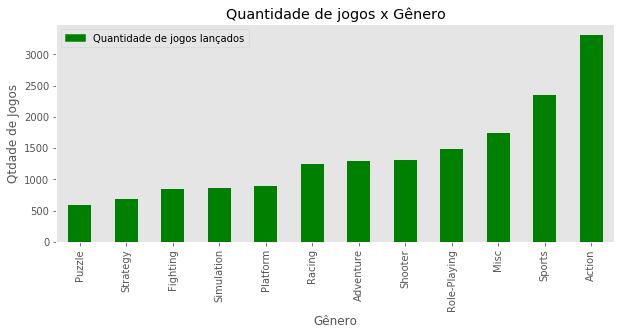

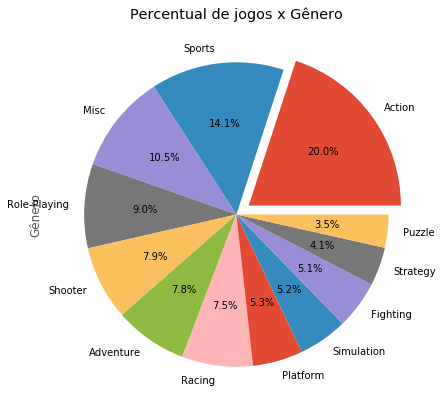

In [0]:
#genero com mais jogos lançados
genero = df.groupby("Gênero").size()
genero.sort_values(ascending=True).plot(kind='bar', color='green',figsize=(10,4)) 
plt.ylabel('Qtdade de Jogos')
plt.title('Quantidade de jogos x Gênero')
green_patch = mpatches.Patch(color='green', label='Quantidade de jogos lançados')
plt.legend(handles=[green_patch])
plt.grid(None)
plt.show()
explode = (0.1, 0, 0, 0,0,0,0,0,0,0,0,0)
gernero_percentual = df['Gênero'].value_counts(normalize=True)*100
gernero_percentual.plot(kind='pie',figsize=(7,7), explode=explode, autopct='%1.1f%%')
plt.title('Percentual de jogos x Gênero')
itemlist = []
for item in genero:
    itemlist.append(item)

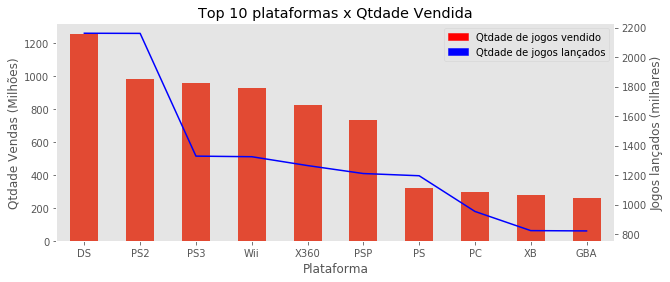

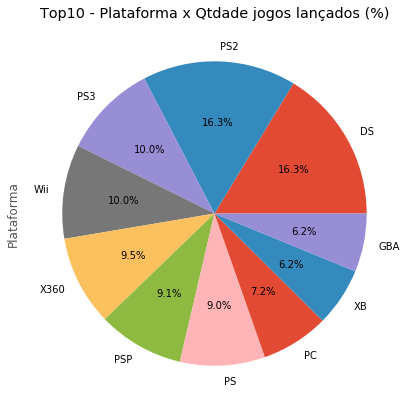

In [0]:
# plataforma com jogos mais vendidos (unidades)
df.groupby("Plataforma")["Vendas Globais"].sum().sort_values(ascending=False).head(10).plot(kind="bar",figsize=(10,4))
plt.ylabel('Qtdade Vendas (Milhões)')
plt.title('Top 10 plataformas x Qtdade Vendida')
red_patch = mpatches.Patch(color='red', label='Qtdade de jogos vendido')
blue_patch = mpatches.Patch(color='blue', label='Qtdade de jogos lançados')
plt.legend(handles=[red_patch,blue_patch])
genero_perc = df['Plataforma'].value_counts().head(10).plot(secondary_y=True, color='blue')
plt.ylabel('Jogos lançados (milhares)')

plt.grid(None)
l,r = plt.xlim()
plt.xlim(l-0.5,r+0.5)
plt.show()

explode = (0.1,0,0,0,0,0,0,0,0,0)
genero_perc = df['Plataforma'].value_counts(normalize=True)*100
genero_perc.head(10).plot(kind='pie',figsize=(7,7),  autopct='%1.1f%%')
plt.title('Top10 - Plataforma x Qtdade jogos lançados (%)')

itemlist = []
for item in genero:
    itemlist.append(item)
# print(genero_perc.head(10))

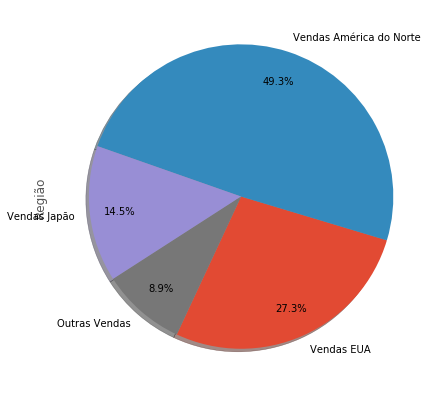

In [0]:
# Regigão de maior unidades vendidas
regiao_globais=df["Vendas Globais"].sum()
regiao_eua=(df["Vendas Europa"].sum()/regiao_globais)*100
regiao_amn=(df["Vendas América do Norte"].sum()/regiao_globais)*100
regiao_japao=(df["Vendas Japão"].sum()/regiao_globais)*100
regiao_outras=(df["Outras Vendas"].sum()/regiao_globais)*100

data = {'Região':[regiao_eua,regiao_amn, regiao_japao, regiao_outras]}
legenda = ['Vendas Europa','Vendas América do Norte','Vendas Japão','Outras Vendas']
grf = pd.DataFrame(data, index=legenda)
grf['Região'].plot(kind='pie', figsize=(7,7), autopct='%1.1f%%',pctdistance=0.8, shadow=True,startangle=-115)
# plt.title("Unidades vendidas x Região")
# plt.ylabel('Total (milhões)')
# plt.plot(legenda,data['teste'])
# plt.show()


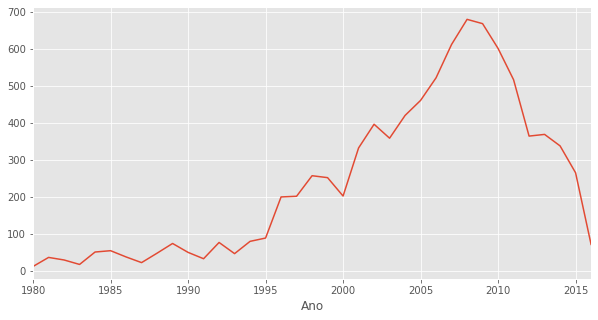

In [0]:
# Vendas anuais
ano_tratada = df[df[u'Ano']!=1979] #retirando titulos de 1979 pois foi preenchido com valores que antes estavam nulos . 
result=ano_tratada.sort_values("Ano",ascending=False)
anos_vendas=result.groupby('Ano')['Vendas Globais'].sum()
anos_vendas.plot(figsize=(10,5),kind='line')
plt.show()


#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [0]:
# lançamentos de jogos Plataforma x Ano
res_2000_2005 = df[(df.Ano >=2000) & (df.Ano <= 2005)]
plataforma_ano = pd.crosstab(res_2000_2005['Plataforma'],res_2000_2005['Ano'])
plataforma_ano['Total'] = plataforma_ano.sum(axis=1)
plataforma_ano = plataforma_ano.sort_values('Total', ascending=False)
plataforma_ano.head(10)



Ano,2000,2001,2002,2003,2004,2005,Total
Plataforma,,,,,,,
PS2,82,185,280,256,259,260,2644
GBA,1,107,198,150,175,135,1532
XB,1,33,158,189,177,179,1474
GC,0,22,152,144,83,97,996
PS,159,91,20,3,0,0,546
PC,7,15,19,33,31,37,284
DS,0,0,0,0,23,118,282
PSP,0,0,0,0,15,97,224
N64,60,9,1,0,0,0,140


In [0]:
# relação de vendas por entre 2000 e 2005
vendas_2000_2005=res_2000_2005.groupby('Plataforma')['Vendas Globais'].sum().head(10).sort_values(ascending=False)
vendas_2000_2005

Plataforma
PS2    967.66
GBA    304.78
GC     185.58
DS     148.86
PS     140.54
PSP     51.36
PC      42.68
N64     37.35
GB      29.00
DC       7.35
Name: Vendas Globais, dtype: float64

In [0]:
# lançamentos de jogos Plataforma x Ano
res_2006_2010 = df[(df.Ano >=2006) & (df.Ano <= 2010)]
plataforma_ano = pd.crosstab(res_2006_2010['Plataforma'],res_2006_2010['Ano'])
plataforma_ano['Total'] = plataforma_ano.sum(axis=1)
plataforma_ano = plataforma_ano.sort_values('Total', ascending=False)
plataforma_ano.head(10)

Ano,2006,2007,2008,2009,2010,Total
Plataforma,,,,,,
DS,202,377,492,405,326,1802
Wii,44,187,282,325,254,1092
PS2,259,214,191,96,38,798
PSP,190,134,100,161,188,773
X360,93,123,146,173,182,717
PS3,27,90,139,162,181,599
PC,52,63,76,109,88,388
XB,62,3,1,0,0,66
GBA,39,6,0,0,0,45


In [0]:
# relação de vendas por entre 2006 e 2010
vendas_2006_2010=res_2006_2010.groupby('Plataforma')['Vendas Globais'].sum().head(10).sort_values(ascending=False)
vendas_2006_2010

Plataforma
Wii     809.28
DS      628.37
X360    575.38
PS3     491.33
PS2     265.33
PSP     211.19
PC       66.50
GC       11.56
GBA       8.78
DC        0.06
Name: Vendas Globais, dtype: float64

In [0]:
# lançamentos de jogos Plataforma x Ano
res_2011_2016 = df[(df.Ano >=2011) & (df.Ano <= 2016)]
plataforma_ano = pd.crosstab(res_2011_2016['Plataforma'],res_2011_2016['Ano'])
plataforma_ano['Total'] = plataforma_ano.sum(axis=1)
plataforma_ano = plataforma_ano.sort_values('Total', ascending=False)
plataforma_ano.head(10)

Ano,2011,2012,2013,2014,2015,2016,Total
Plataforma,,,,,,,
PS3,216,148,127,108,74,32,705
3DS,116,93,91,79,86,35,500
X360,206,106,75,65,40,8,500
PSV,18,54,63,102,113,60,410
PC,137,61,38,44,50,38,368
PS4,0,0,16,75,137,107,335
PSP,139,106,54,10,3,0,312
XOne,0,0,19,61,79,54,213
Wii,144,32,12,6,4,0,198


In [0]:
# relação de vendas por entre 2006 e 2010
vendas_2011_2016=res_2011_2016.groupby('Plataforma')['Vendas Globais'].sum().head(10).sort_values(ascending=False)
vendas_2011_2016

Plataforma
PS3     458.02
PS4     278.07
3DS     246.28
Wii     100.53
PC       95.48
WiiU     81.86
PSV      61.61
DS       41.42
PSP      29.16
PS2       0.47
Name: Vendas Globais, dtype: float64

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [0]:
#Correlação de Unidades Vendidas com quantidade de jogos lançados
res_2006_2010[res_2006_2010['Plataforma']=='PS2']['Vendas Globais'].sum()
total_J_ps2=res_2006_2010[res_2006_2010['Plataforma']=='PS2']
total_J_ps2=total_J_ps2['Plataforma'].count()

res_2006_2010[res_2006_2010['Plataforma']=='DS']['Vendas Globais'].sum()
total_J_DS=res_2006_2010[res_2006_2010['Plataforma']=='DS']
total_J_DS= total_J_DS['Plataforma'].count()

res_2006_2010[res_2006_2010['Plataforma']=='Wii']['Vendas Globais'].sum()
total_J_wii=res_2006_2010[res_2006_2010['Plataforma']=='Wii']
total_J_wii= total_J_wii['Plataforma'].count()

uni_vendidas_ps2 = res_2006_2010[res_2006_2010['Plataforma']=='PS2']['Vendas Globais'].sum()
uni_vendidas_ds = res_2006_2010[res_2006_2010['Plataforma']=='DS']['Vendas Globais'].sum()
uni_vendidas_wii = res_2006_2010[res_2006_2010['Plataforma']=='Wii']['Vendas Globais'].sum()

total_variavel = {'Jogos lançados 2000 a 2006':[total_J_ps2,total_J_DS,total_J_wii],
                  'Unidades Vendidas':[uni_vendidas_ps2,uni_vendidas_ds,uni_vendidas_wii]}

pd.DataFrame(total_variavel,index=['PS2','DS','Wii'])



,Jogos lançados 2000 a 2006,Unidades Vendidas
PS2,798,265.33
DS,1802,628.37
Wii,1092,809.28


### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

Em análise da base em anexo podemos concluir que os anos dourados do videgame para vendas foi entre 1995 e 2010, onde as vendas começaram a cair.

O Gênero que mais vende games é o de Ação;

A console que mais vendeu jogos foi o PS2.

A região que mais vende games no mundo é a America do Norte.